In [113]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [114]:
sns.set_style("darkgrid")

In [115]:
#Valores úteis e mapeamento de códigos
DicioRacacor = {"01":"BRANCA", 
                "02": "PRETA", 
                "03": "PARDA", 
                "04": "AMARELA", 
                "05": "INDÍGENA", 
                "99": "S/ INFO",
                "00": "00"}

def FaixaEtaria(x):
  try:
    if x < 7:
      return "0-6 anos "
    elif 6 < x < 13:
      return "7-12 anos "
    elif 12 < x < 19:
      return "13-18 anos "
    elif 18 < x < 31:
      return "19-30 anos"
    elif 30 < x < 51:
      return "31-50 anos"
    else:
      return "maior de 50 anos" 
  except: pass

DicioEstados = {"RO": "Rondonia",
                "AC":"Acre",
                "AM":"Amazonas",
                "RR":"Roraima",
                "PA":"Para",
                "AP":"Amapa",
                "TO":"Tocantins",
                "MA":"Maranhao",
                "PI":"Piaui",
                "CE":"Ceara",
                "RN":"Rio Grande do Norte",
                "PB":"Paraiba",
                "PE":"Pernambuco",
                "AL":"Alagoas",
                "SE":"Sergipe",
                "BA":"Bahia",
                "MG":"Minas Gerais",
                "ES":"Espirito Santo",
                "RJ":"Rio de Janeiro",
                "SP":"Sao Paulo",
                "PR":"Parana",
                "SC":"Santa Catarina",
                "RS":"Rio Grande do Sul",
                "MS":"Mato Grosso do Sul",
                "MT":"Mato Grosso",
                "GO":"Goias",
                "DF":"Distrito Federal"}   

In [116]:
#Montagem do Drive Google (Conta covid.data.mais@gmail.com)
from google.colab import drive 
drive.mount('/content/gdrive',force_remount=True)


Mounted at /content/gdrive


In [117]:
#Defininddo DataFrame municípios e coordenadas
path_MUNI = '/content/gdrive/MyDrive/DERMATITE_ATOPICA/municipios.csv'
dfMUNI = pd.read_csv(path_MUNI, usecols=["codigo_ibge", "nome", "latitude", "longitude" ], dtype={"codigo_ibge":"object"} )# columns=["CO_MUNICIP", "DS_NOME", "DS_NOMEPAD"]).set_index("CO_MUNICIP")
dfMUNI["codigo_ibge"] = dfMUNI["codigo_ibge"].apply(lambda x: x[:-1])
dfMUNI = dfMUNI.set_index("codigo_ibge")
dfMUNI.drop_duplicates(inplace=True)

#Defininddo DataFrame municípios e População
path_pop_brasil = "/content/gdrive/MyDrive/DERMATITE_ATOPICA/POP_BRASIL_MUNICIPIO.csv"
dfPOP = pd.read_csv(path_pop_brasil, delimiter=";", encoding="latin")
dfPOP["COD_MUN"] = dfPOP["Município"].apply(lambda x: x[0:6])
dfPOP["MUNICIPIO"] = dfPOP["Município"].apply(lambda x: x[7:])
dfPOP.drop(["Município"], axis=1, inplace=True)
dfPOP.set_index("COD_MUN", inplace=True)
dfPOP.head()

#Definindo DataFrame municípios e PIB
path_PIB_brasil = "/content/gdrive/MyDrive/DERMATITE_ATOPICA/PIB_MUN_BR_2010_MIL_REAIS.csv"
dfPIB = pd.read_csv(path_PIB_brasil, delimiter=",", dtype={"COD_MUN": "O"})
dfPIB["COD_MUN"] = dfPIB["COD_MUN"].apply(lambda x: x[:-1])
dfPIB.set_index("COD_MUN", inplace=True) 
dfPIB.head()

#Defininddo DataFrame CID e descrição da doença
path_SIGTAP_CID = '/content/gdrive/MyDrive/DERMATITE_ATOPICA/tb_sigtap_cid/tb_sigtap_cid.parquet'
dfCID = pd.read_parquet(path_SIGTAP_CID, engine='pyarrow', columns=["CO_CID", "NO_CID"]).set_index("CO_CID")
dfCID.drop_duplicates(inplace=True)
dfCID.to_csv("/content/gdrive/MyDrive/DERMATITE_ATOPICA/DATASETS_DERM_ATOP"+"/"+"SIGTAP_CID.csv")
#dfCID.head()

#Defininddo DataFrame Código do procedimento
path_SIGTAP_PROC = '/content/gdrive/MyDrive/DERMATITE_ATOPICA/tb_sigtap_procedimento/tb_sigtap_procedimento_1.parquet'
dfPROC = pd.read_parquet(path_SIGTAP_PROC, engine='pyarrow', columns=["CO_PROCEDIMENTO", "NO_PROCEDIMENTO"]).set_index("CO_PROCEDIMENTO")
dfPROC.drop_duplicates(inplace=True)
dfPROC.to_csv("/content/gdrive/MyDrive/DERMATITE_ATOPICA/DATASETS_DERM_ATOP"+"/"+"SIGTAP_PROC.csv")
#dfPROC.head()

# #Series com resultado do mapeamento da idades SIA
# path_Serie_Idade_Geral = "/content/gdrive/MyDrive/DERMATITE_ATOPICA/ageseries.csv"
# dfIDADESIA = pd.read_csv(path_Serie_Idade_Geral, names = ["IDADE", "QUANTIDADE"], skiprows=1)

In [118]:
#DataFrame com informações reunidas sobre os municípios
dfMUNICIPIOS = dfMUNI.join(dfPOP).join(dfPIB, rsuffix="2").drop(["nome"], axis=1)
dfMUNICIPIOS["UF"] = dfMUNICIPIOS["MUNICIPIO2"].apply(lambda x: x[-3:-1])
dfMUNICIPIOS["Estado"] = dfMUNICIPIOS["UF"].apply(lambda x: DicioEstados[x])
dfMUNICIPIOS.drop(["MUNICIPIO2"], axis=1).to_csv("/content/gdrive/MyDrive/DERMATITE_ATOPICA/DATASETS_DERM_ATOP"+"/"+"MUNICIPIOS.csv")

In [119]:
dfMUNICIPIOS

,latitude,longitude,População_residente,MUNICIPIO,MUNICIPIO2,PIB_1000,UF,Estado
codigo_ibge,,,,,,,,
520005,-16.75730,-49.4412,7164.0,Abadia de Goiás,Abadia de Goiás (GO),227500,GO,Goias
310010,-18.48310,-47.3916,6743.0,Abadia dos Dourados,Abadia dos Dourados (MG),127960,MG,Minas Gerais
520010,-16.19700,-48.7057,16408.0,Abadiânia,Abadiânia (GO),316432,GO,Goias
310020,-19.15510,-45.4444,22740.0,Abaeté,Abaeté (MG),494335,MG,Minas Gerais
150010,-1.72183,-48.8788,144415.0,Abaetetuba,Abaetetuba (PA),1413838,PA,Para
...,...,...,...,...,...,...,...,...
293360,-10.82300,-42.7245,45660.0,Xique-Xique,Xique-Xique (BA),392049,BA,Bahia
251740,-8.07901,-37.1057,2109.0,Zabelê,Zabelê (PB),23862,PB,Paraiba
355715,-21.05060,-50.0552,2394.0,Zacarias,Zacarias (SP),88517,SP,Sao Paulo


In [120]:
#Defininddo DataFrame SIAL (Todos os registros de atendimento ambulatorial com CID "L")

colunassia = ["PA_CODUNI","PA_UFMUN", "PA_CMP", "PA_IDADE", "PA_SEXO", "PA_RACACOR", "PA_CIDPRI", 
               "PA_CIDSEC", "PA_CIDCAS", "PA_PROC_ID","PA_DOCORIG","PA_VALPRO", "NU_PA_TOT"]

dtype=np.dtype
diciosia = {"PA_CODUNI": dtype('O'), 'PA_UFMUN': dtype('O'), 'PA_CMP': dtype('O'), 'PA_CIDPRI': dtype('O'), 
                 'PA_CIDSEC': dtype('O'),'PA_CIDCAS': dtype('O'), 'PA_IDADE': dtype('int32'), 
               'PA_SEXO': dtype('O'), 'PA_RACACOR': dtype('O'), 'PA_PROC_ID': dtype('O'), 'PA_DOCORIG':dtype('O'), 'PA_QTDPRO': dtype('O'),
               'PA_VALPRO': dtype('float64'),'NU_PA_TOT': dtype('float64'), "PA_AUTORIZ":dtype('O') }   

dfSIAL = pd.read_csv("/content/gdrive/MyDrive/DERMATITE_ATOPICA"+"/"+"df_SIA_total_L_2.csv", usecols=colunassia, dtype=diciosia, 
                    parse_dates=["PA_CMP"]).set_index("PA_PROC_ID")
dfSIAL.drop_duplicates(inplace=True)

mask_after_2016 = (dfSIAL["PA_CMP"] > pd.Timestamp("2016-01-01"))

#Selecionando valores depois de 2016 para caso de erro de digitação
dfSIAL = dfSIAL[mask_after_2016]

#Incluindo coluna de faixas etárias
dfSIAL["FAIXA_ETARIA"] = dfSIAL["PA_IDADE"].apply(FaixaEtaria)

#Colunas booleanas para selecionar CID primário 
dfSIAL["L_CID_PRIMÁRIO"] = dfSIAL["PA_CIDPRI"].str.contains("L")
dfSIAL["L20_CID_PRIMÁRIO"] = dfSIAL["PA_CIDPRI"].str.contains("L20")

dfSIAL.head()

,PA_CODUNI,PA_UFMUN,PA_CMP,PA_IDADE,PA_SEXO,PA_RACACOR,PA_CIDPRI,PA_CIDSEC,PA_CIDCAS,PA_DOCORIG,PA_VALPRO,NU_PA_TOT,FAIXA_ETARIA,L_CID_PRIMÁRIO,L20_CID_PRIMÁRIO
PA_PROC_ID,,,,,,,,,,,,,,,
0401010104,2551764,260120,2017-04-01,67,M,S/ INFO,L029,0000,0000,I,11.84,11.84,maior de 50 anos,True,False
0401010104,2551764,260120,2017-04-01,51,M,S/ INFO,L029,0000,0000,I,11.84,11.84,maior de 50 anos,True,False
0604590024,6471188,261160,2017-04-01,25,F,PARDA,L700,0000,0000,P,0.00,0.00,19-30 anos,True,False
0604590024,6471188,261160,2017-04-01,37,F,PARDA,L700,0000,0000,P,0.00,0.00,31-50 anos,True,False
0604590024,6471188,261160,2017-04-01,14,M,BRANCA,L700,0000,0000,P,0.00,0.00,13-18 anos,True,False


In [121]:
dfSIAL.to_csv("/content/gdrive/MyDrive/DERMATITE_ATOPICA/DATASETS_DERM_ATOP"+"/"+"AMBULATORIAL_2.csv")

In [122]:
#dfSIAL["ID"] = dfSIAL["PA_CODUNI"] + dfSIAL["PA_SEXO"]+dfSIAL["PA_RACACOR"]
#len(dfSIAL["ID"].unique()), len(dfSIAL)

In [123]:
#Defininddo DataFrame SIH

colunashosp = ["N_AIH","MUNIC_RES", "SEXO", "IDADE","NASC",
                "RACA_COR",  "PROC_REA", "VAL_TOT", "US_TOT", "DT_INTER", "DT_SAIDA",
               'QT_DIARIAS',"DIAS_PERM","DIAG_PRINC",  "DIAGSEC1", 
               "DIAGSEC2", "DIAGSEC3"]

hosp_dict_types={'N_AIH': dtype('O'),'MUNIC_RES': dtype('O'), 'SEXO': dtype('O'), 
                   'RACA_COR': dtype('O'), 'PROC_REA': dtype("O"), 'VAL_TOT': dtype('float64'),'US_TOT': dtype('float64'),
                 'DT_INTER': dtype('O'), 'DT_SAIDA': dtype('O'),'QT_DIARIAS': dtype('int32'),'DIAG_PRINC': dtype('O'), 'DIAS_PERM': dtype('int32'),
                 'IDADE': dtype('int32'), 'NASC': dtype('O'), 'DIAGSEC1': dtype('O'), 
                 'DIAGSEC2': dtype('O'), 'DIAGSEC3': dtype('O')}
            

#Valores úteis
DicioRacacor = {"01":"BRANCA", 
                "02": "PRETA", 
                "03": "PARDA", 
                "04": "AMARELA", 
                "05": "INDÍGENA", 
                "99": "S/ INFO",
                "00": "00"}

DicioSexo = {"1": "Masculino", "3": "Feminino"}

dfhospL = pd.read_csv('/content/gdrive/MyDrive/DERMATITE_ATOPICA/L_Hosp_dataset_FINAL.csv',
                     usecols=colunashosp, dtype=hosp_dict_types, parse_dates=["DT_INTER", "DT_SAIDA", "NASC"])

#Tratamento coluna SEXO
dfhospL["SEXO"] = dfhospL["SEXO"].apply(lambda x: DicioSexo[x])
#Tratamento coluna RACA_COR
dfhospL["RACA_COR"] = dfhospL["RACA_COR"].apply(lambda x: DicioRacacor[x])

dfhospL.drop_duplicates(inplace=True)

mask_after_2016 = (dfhospL['DT_INTER'] > pd.Timestamp("2016-01-01"))
dfhospL = dfhospL[mask_after_2016]

#Tratamento Coluna Faixa Etária
dfhospL["FAIXA_ETARIA"] = dfhospL["IDADE"].apply(FaixaEtaria)

#Colunas booleanas para selecionar CID primário 
dfhospL["L_CID_PRIMARIO"] = dfhospL["DIAG_PRINC"].str.contains("L")
dfhospL["L20_CID_PRIMARIO"] = dfhospL["DIAG_PRINC"].str.contains("L20")


dfhospL.head()


,MUNIC_RES,N_AIH,SEXO,IDADE,NASC,RACA_COR,PROC_REA,VAL_TOT,US_TOT,DT_INTER,DT_SAIDA,QT_DIARIAS,DIAS_PERM,DIAG_PRINC,DIAGSEC1,DIAGSEC2,DIAGSEC3,FAIXA_ETARIA,L_CID_PRIMARIO,L20_CID_PRIMARIO
0,355030,3517114674887,Masculino,49,1968-04-10,S/ INFO,0301060088,44.22,13.40,2017-05-27,2017-05-28,1,1,L030,NaN,NaN,NaN,31-50 anos,True,False
1,352310,3517113941913,Masculino,33,1983-06-26,BRANCA,0401020100,158.11,47.91,2017-05-12,2017-05-12,0,0,L989,NaN,NaN,NaN,31-50 anos,True,False
2,355030,3517113941968,Feminino,40,1976-08-15,PRETA,0401020100,158.11,47.91,2017-05-12,2017-05-12,0,0,L989,NaN,NaN,NaN,31-50 anos,True,False
3,355030,3517114189006,Masculino,50,1966-10-02,PARDA,0401020070,167.72,50.82,2017-05-03,2017-05-03,1,0,L720,NaN,NaN,NaN,31-50 anos,True,False
4,355030,3517108978064,Feminino,45,1972-03-17,BRANCA,0401020100,158.11,47.91,2017-05-16,2017-05-16,0,0,L989,NaN,NaN,NaN,31-50 anos,True,False


In [124]:
dfhospL.to_csv("/content/gdrive/MyDrive/DERMATITE_ATOPICA/DATASETS_DERM_ATOP"+"/"+"HOSPITALAR_2.csv")

In [154]:
#Dataset com "L20" em alguma das colunas de CID
maskl20 = (dfSIAL["PA_CIDPRI"].str.contains("L20")) | (dfSIAL["PA_CIDSEC"].str.contains("L20")) | (dfSIAL["PA_CIDCAS"].str.contains("L20"))
l20 = dfSIAL[maskl20]
l20 = l20.join(dfPROC)
#Contagem dos procedimentos associados ao CID L20

print(f"Total de registros SIA com CID L: {len(dfSIAL)}")
print(f"Total de registros SIA com CID L20: {len(l20)}")
print(f"Proporção dos atendimentos L20 / L: {round((len(l20)/len(dfSIAL))*100, ndigits=2)} por cento")

Total de registros SIA com CID L: 3661441
Total de registros SIA com CID L20: 36680
Proporção dos atendimentos L20 / L: 1.0 por cento


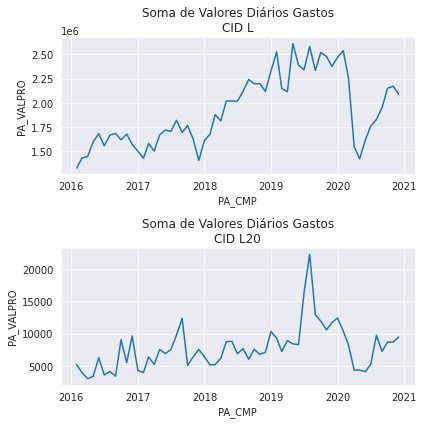

In [126]:
#Plotando Soma de valores gastos por dia

fig, axes = plt.subplots(nrows=2, ncols=1)
fig.set_size_inches(6,6)


sns.lineplot(data = dfSIAL.groupby("PA_CMP").sum()["PA_VALPRO"], ax=axes[0]);
axes[0].set_title("Soma de Valores Diários Gastos"+"\n"+"CID L");

sns.lineplot(data = l20.groupby("PA_CMP").sum()["PA_VALPRO"], ax=axes[1]);
axes[1].set_title("Soma de Valores Diários Gastos"+"\n"+"CID L20");



plt.tight_layout() 

In [127]:
print(f"Atendimentos  CID L20 com pico no dia {l20.groupby('PA_CMP').sum()['PA_VALPRO'].idxmax()}")
#Interessante investigar

Atendimentos  CID L20 com pico no dia 2019-08-01 00:00:00


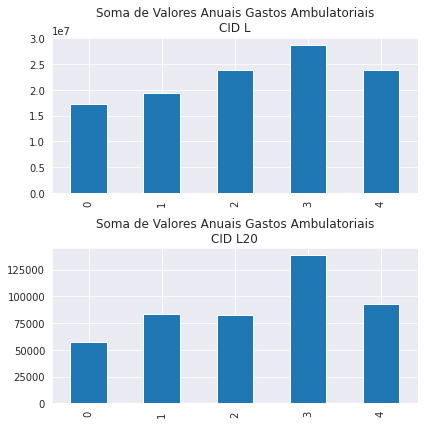

In [128]:
#Plotando Soma de valores gastos por ano

fig, axes = plt.subplots(nrows=2, ncols=1)
fig.set_size_inches(6,6)


dfSIAL.groupby(pd.Grouper(key = "PA_CMP", freq='Y')).sum()["PA_VALPRO"].plot(kind="bar",
                                                                            use_index=False,
                                                                            #xticks= ["2016", "2017", "2018", "2019", "2020"],
                                                                            ax=axes[0]);
axes[0].set_title("Soma de Valores Anuais Gastos Ambulatoriais"+"\n"+"CID L");

l20.groupby(pd.Grouper(key = "PA_CMP", freq='Y')).sum()["PA_VALPRO"].plot(kind = "bar",
                                                                          use_index=False, 
                                                                          ax=axes[1]);
axes[1].set_title("Soma de Valores Anuais Gastos Ambulatoriais"+"\n"+"CID L20");

plt.tight_layout()

In [129]:
# aumento2016_2019SIAL = (dfSIAL.groupby(pd.Grouper(key = 'PA_CMP', freq='Y')).sum()['PA_VALPRO'].pct_change(periods=3)[3])*100
# aumento2016_2019SIAL20 = (l20.groupby(pd.Grouper(key = 'PA_CMP', freq='Y')).sum()['PA_VALPRO'].pct_change(periods=3)[3])*100
# print(f"Aumento de {aumento2016_2019SIAL.round(2)} por cento de 2016 a 2019 "+"\n"+"gastos com CID L")
# print("\n")
# print(f"Aumento de {aumento2016_2019SIAL20.round(2)} por cento de 2016 a 2019 "+"\n"+"gastos com CID L20")

In [130]:
#CID primário onde o CID L20 foi citado, mas como secundário ou associado. 
l20sec = l20[~l20["PA_CIDPRI"].str.contains("L20")]["PA_CIDPRI"].value_counts()
pd.DataFrame(l20sec).join(dfCID)

,PA_CIDPRI,NO_CID
0000,18,NaN
S10,4,Traumatismo superficial do pescoço
I209,1,"Angina pectoris, não especificada"
I64,1,"Acidente vascular cerebral, não especificado c..."


Os registros onde CID L20 é citado como secundário ou associado são poucos e associados a condições não dermatológicas, ou não especificados

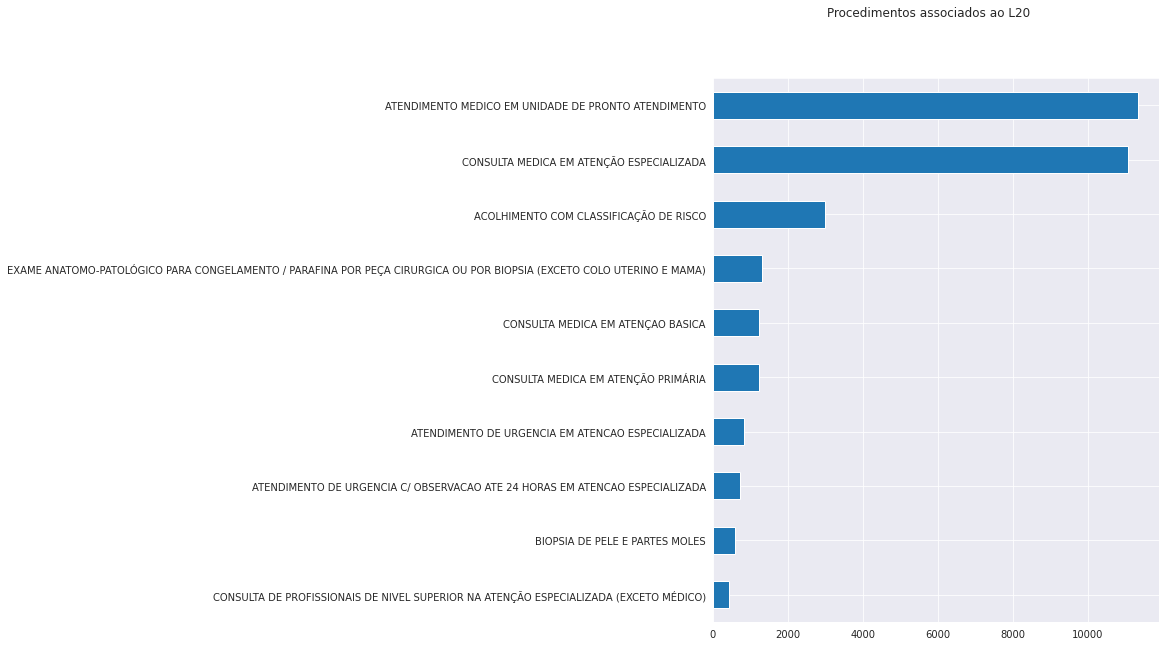

In [131]:
plt.figure(figsize=(8,10))
plt.suptitle("Procedimentos associados ao L20")
l20["NO_PROCEDIMENTO"].value_counts()[0:10].plot(kind='barh').invert_yaxis()

Grande maioria dos procedimentos não discrimina a complexidade da doença (Dermatie Atópica Leve, Moderada ou Grave)

Tentando identificar os caso moderados e graves de acordo com o procedimento realizado.

Nomes de tratamentos e medicações associados ao tratamento da Dermatite Atópica moderada a grave:
- FOTOTERAPIA (BANHO DE LUZ), DEXAMETASONA, HIDROXIZINE, METOTREXATO, CICLOSPORINA, AZATIOPRINA, MICOFENOLATO de MOFETILA, DUPILUMABE

In [132]:
#String para uso como regex na busca pelos termos
listamedi = "FOTOTERAPIA|DEXAMETASONA|HIDROXIZINA|HIDROXIZINE|METOTREXATO|CICLOSPORINA|AZATIOPRINA|MICOFENOLATO|DUPILUMABE"

#Registros na tabela de Procedimentos CID com os nomes citados 
dfPROC[dfPROC["NO_PROCEDIMENTO"].str.contains(listamedi, regex=True)]

,NO_PROCEDIMENTO
CO_PROCEDIMENTO,
0202060446,TESTE DE SUPRESSAO DO CORTISOL APOS DEXAMETASONA
0202070182,DOSAGEM DE CICLOSPORINA
0202070298,DOSAGEM DE METOTREXATO
0303080108,FOTOTERAPIA (POR SESSÃO)
0303080116,FOTOTERAPIA COM FOTOSSENSIBILIZAÇÃO (POR SESSÃO)
0501080031,DOSAGEM DE CICLOSPORINA (EM PACIENTE TRANSPLAN...
0603020011,CICLOSPORINA 50MG (POR CAPSULA)
0603020020,CICLOSPORINA 100MG (POR CAPSULA)
0603020038,CICLOSPORINA 100MG/ML SOLUCAO ORAL


In [133]:
 #Registros L20 de Procedimentos com os nomes citados 
tratl20 = l20[l20["NO_PROCEDIMENTO"].str.contains(listamedi, regex=True, na=False)]
tratl20

,PA_CODUNI,PA_UFMUN,PA_CMP,PA_IDADE,PA_SEXO,PA_RACACOR,PA_CIDPRI,PA_CIDSEC,PA_CIDCAS,PA_DOCORIG,PA_VALPRO,NU_PA_TOT,FAIXA_ETARIA,L_CID_PRIMÁRIO,L20_CID_PRIMÁRIO,NO_PROCEDIMENTO
0202070182,2078015,355030,2017-12-01,11,M,PARDA,L209,0000,0000,I,58.61,58.61,7-12 anos,True,True,DOSAGEM DE CICLOSPORINA
0202070182,2078015,355030,2016-12-01,16,F,BRANCA,L209,0000,0000,I,58.61,58.61,13-18 anos,True,True,DOSAGEM DE CICLOSPORINA
0202070182,2078015,355030,2017-01-01,11,F,BRANCA,L209,0000,0000,I,58.61,58.61,7-12 anos,True,True,DOSAGEM DE CICLOSPORINA
0202070182,2077396,354980,2017-02-01,19,M,BRANCA,L209,0000,0000,I,58.61,58.61,19-30 anos,True,True,DOSAGEM DE CICLOSPORINA
0202070182,2078015,355030,2017-02-01,8,M,BRANCA,L209,0000,0000,I,58.61,58.61,7-12 anos,True,True,DOSAGEM DE CICLOSPORINA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0202070182,2078015,355030,2016-08-01,11,F,BRANCA,L209,0000,0000,I,58.61,58.61,7-12 anos,True,True,DOSAGEM DE CICLOSPORINA
0202070182,2078015,355030,2016-11-01,11,F,BRANCA,L200,0000,0000,I,58.61,58.61,7-12 anos,True,True,DOSAGEM DE CICLOSPORINA
0202070182,2078015,355030,2016-10-01,10,M,PARDA,L200,0000,0000,I,58.61,58.61,7-12 anos,True,True,DOSAGEM DE CICLOSPORINA
0202070182,2078015,355030,2016-11-01,16,F,BRANCA,L200,0000,0000,I,58.61,58.61,13-18 anos,True,True,DOSAGEM DE CICLOSPORINA


In [134]:
tratl20["NO_PROCEDIMENTO"].value_counts()

DOSAGEM DE CICLOSPORINA    93
Name: NO_PROCEDIMENTO, dtype: int64

Da lista de medicações e tratamentos citados para tratamento da Dermatite Atópica moderada e grave, apenas ciclosporina aparece nos registros, em 93 casos. O que é bem pouco em comparação às 36680 ocorrências de CID L20 

In [135]:
#Descrição dos CID onde "L20"  foi usado alguma das medicações
pd.DataFrame(tratl20["PA_CIDPRI"].value_counts()).join(dfCID)

,PA_CIDPRI,NO_CID
L209,76,"Dermatite atópica, não especificada"
L200,12,Prurigo de besnier
L208,5,Outras dermatites atópicas


Análise do DATASET HOSPITALAR

In [136]:
dfhospL.head()

,MUNIC_RES,N_AIH,SEXO,IDADE,NASC,RACA_COR,PROC_REA,VAL_TOT,US_TOT,DT_INTER,DT_SAIDA,QT_DIARIAS,DIAS_PERM,DIAG_PRINC,DIAGSEC1,DIAGSEC2,DIAGSEC3,FAIXA_ETARIA,L_CID_PRIMARIO,L20_CID_PRIMARIO
0,355030,3517114674887,Masculino,49,1968-04-10,S/ INFO,0301060088,44.22,13.40,2017-05-27,2017-05-28,1,1,L030,NaN,NaN,NaN,31-50 anos,True,False
1,352310,3517113941913,Masculino,33,1983-06-26,BRANCA,0401020100,158.11,47.91,2017-05-12,2017-05-12,0,0,L989,NaN,NaN,NaN,31-50 anos,True,False
2,355030,3517113941968,Feminino,40,1976-08-15,PRETA,0401020100,158.11,47.91,2017-05-12,2017-05-12,0,0,L989,NaN,NaN,NaN,31-50 anos,True,False
3,355030,3517114189006,Masculino,50,1966-10-02,PARDA,0401020070,167.72,50.82,2017-05-03,2017-05-03,1,0,L720,NaN,NaN,NaN,31-50 anos,True,False
4,355030,3517108978064,Feminino,45,1972-03-17,BRANCA,0401020100,158.11,47.91,2017-05-16,2017-05-16,0,0,L989,NaN,NaN,NaN,31-50 anos,True,False


In [137]:
#Dataset com "L20" em alguma das colunas de CID
maskl20_hosp = (dfhospL["DIAG_PRINC"].str.contains("L20")) | (dfhospL["DIAGSEC1"].str.contains("L20")) | (dfhospL["DIAGSEC2"].str.contains("L20")| (dfhospL["DIAGSEC3"].str.contains("L20")))
l20_hosp = dfhospL[maskl20_hosp]
l20_hosp = l20_hosp.set_index("PROC_REA").join(dfPROC)
#Contagem dos procedimentos associados ao CID L20

print(f"Total de registros SIH com CID L: {len(dfhospL)}")
print(f"Total de registros SIH com CID L20: {len(l20_hosp)}")
print(f"Proporção dos atendimentos L20 / L  : {round(((len(l20_hosp)/len(dfhospL))*100), ndigits=2)} por cento")

Total de registros SIH com CID L: 1271736
Total de registros SIH com CID L20: 5250
Proporção dos atendimentos L / L20: 0.41 por cento


In [138]:
#CID Primário onde o CID L20 foi citado, mas como secundário ou associado 
l20hospsec = l20_hosp[~l20_hosp["DIAG_PRINC"].str.contains("L20")]["DIAG_PRINC"].value_counts()
pd.DataFrame(l20hospsec).join(dfCID)

,DIAG_PRINC,NO_CID
J459,47,Asma não especificada
A499,29,Infecção bacteriana não especificada
A490,24,Infecção estafilocócica de localização não esp...
L010,23,Impetigo [qualquer localização] [qualquer micr...
L031,20,Celulite de outras partes do(s) membro(s)
...,...,...
R55,1,Síncope e colapso
J81,1,"Edema pulmonar, não especificado de outra forma"
D580,1,Esferocitose hereditária
Q059,1,Espinha bífida não especificada


Poucos registros de CID L20 como diagnóstico não primário, porém aparecem registros de condições dermatológicas no CID primário

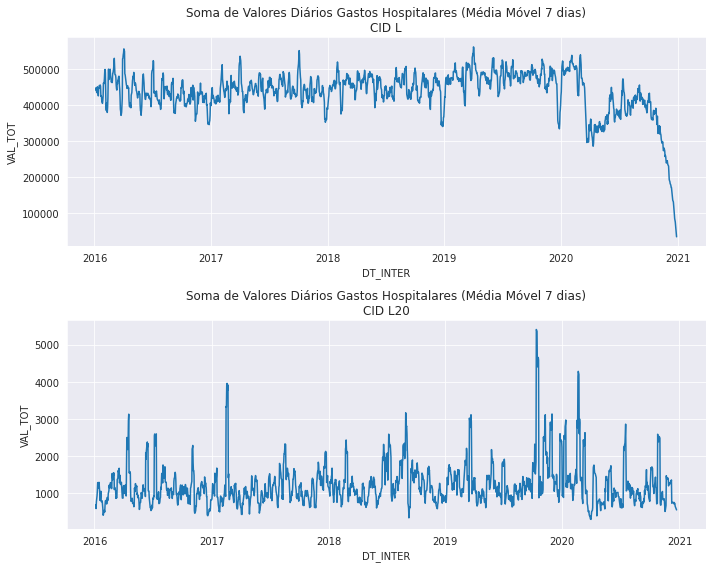

In [139]:
#Prévia da soma de valores gastos por dia

fig, axes = plt.subplots(nrows=2, ncols=1)
fig.set_size_inches(10,8)


sns.lineplot(data = dfhospL.groupby("DT_INTER").sum()["VAL_TOT"].rolling(7, center=True).mean(), ax=axes[0]);
axes[0].set_title("Soma de Valores Diários Gastos Hospitalares (Média Móvel 7 dias)"+"\n"+"CID L");

sns.lineplot(data = l20_hosp.groupby("DT_INTER").sum()["VAL_TOT"].rolling(7, center=True).mean(), ax=axes[1]);
axes[1].set_title("Soma de Valores Diários Gastos Hospitalares (Média Móvel 7 dias)"+"\n"+"CID L20");

plt.tight_layout()

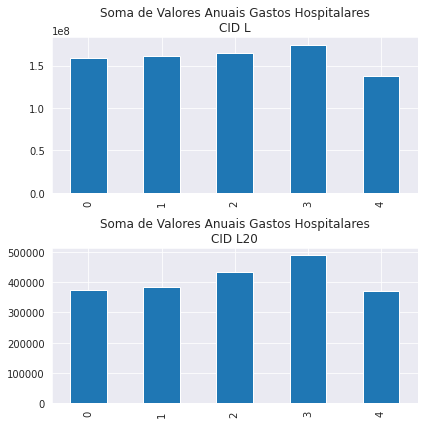

In [140]:
# Prévia soma de valores gastos por ano

fig, axes = plt.subplots(nrows=2, ncols=1)
fig.set_size_inches(6,6)


dfhospL.groupby(pd.Grouper(key = "DT_INTER", freq='Y')).sum()["VAL_TOT"].plot(kind="bar",
                                                                            use_index=False,
                                                                            #xticks= ["2016", "2017", "2018", "2019", "2020"],
                                                                            ax=axes[0]);
axes[0].set_title("Soma de Valores Anuais Gastos Hospitalares"+"\n"+"CID L");

l20_hosp.groupby(pd.Grouper(key = "DT_INTER", freq='Y')).sum()["VAL_TOT"].plot(kind = "bar",
                                                                          use_index=False, 
                                                                          ax=axes[1]);
axes[1].set_title("Soma de Valores Anuais Gastos Hospitalares"+"\n"+"CID L20");

plt.tight_layout()

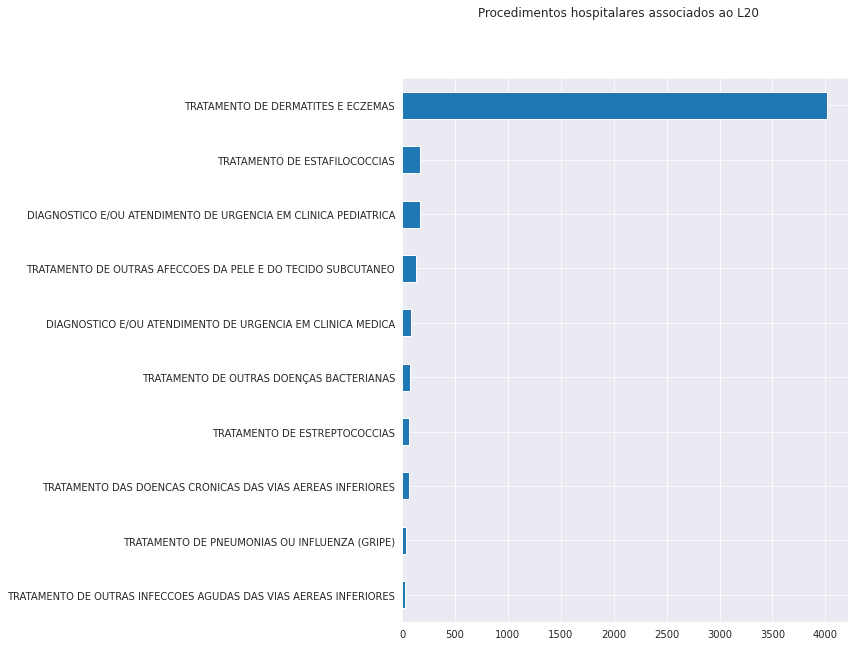

In [142]:
#Plotando nome dos procedimentos hospitalares associados ao L20"
plt.figure(figsize=(8,10))
plt.suptitle("Procedimentos hospitalares associados ao L20")
l20_hosp["NO_PROCEDIMENTO"].value_counts()[0:10].plot(kind='barh').invert_yaxis()

Análises por município: entendo a distribuição geográfica da doena e gastos associados

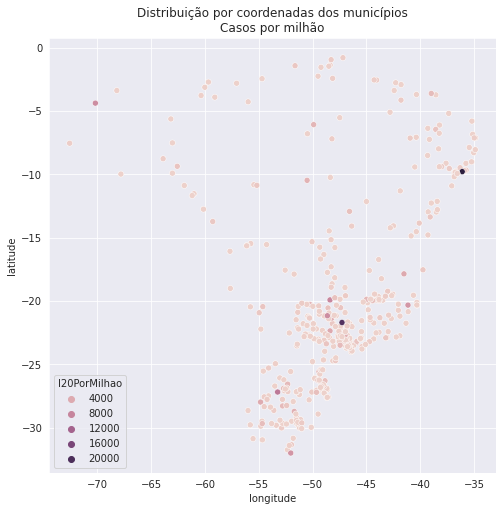

In [143]:
#Dataset de casos por milhão de habitantes e plot da prévia
CasosPorPop = l20.groupby("PA_UFMUN").count()[["PA_CODUNI", "PA_CMP"]].join(dfMUNICIPIOS) 
CasosPorPop = CasosPorPop.drop('MUNICIPIO2', axis=1)
CasosPorPop["l20PorMilhao"] = (CasosPorPop["PA_CODUNI"] / CasosPorPop["População_residente"])*1000000

plt.figure(figsize=(8,8))
plt.title("Distribuição por coordenadas dos municípios" +"\n"+ "Casos por milhão")
sns.scatterplot(data= CasosPorPop, x="longitude", y ="latitude", hue="l20PorMilhao" );

In [155]:
#10 municípios com maior número de casos por milhão de habitantes de Dermatite Atópica
CasosPorPop.to_csv("/content/gdrive/MyDrive/DERMATITE_ATOPICA/DATASETS_DERM_ATOP"+"/"+"CasosSIAPorPOP.csv")
CasosPorPop.sort_values(by="l20PorMilhao", ascending=False)[["MUNICIPIO", "UF"]][0:10]

,MUNICIPIO,UF
PA_UFMUN,,
270860,São Miguel dos Campos,AL
355330,Tambaú,SP
431050,Iraí,RS
311730,Conceição das Alagoas,MG
130020,Atalaia do Norte,AM
355690,Vista Alegre do Alto,SP
431850,São José do Norte,RS
320506,Venda Nova do Imigrante,ES
352440,Jacareí,SP


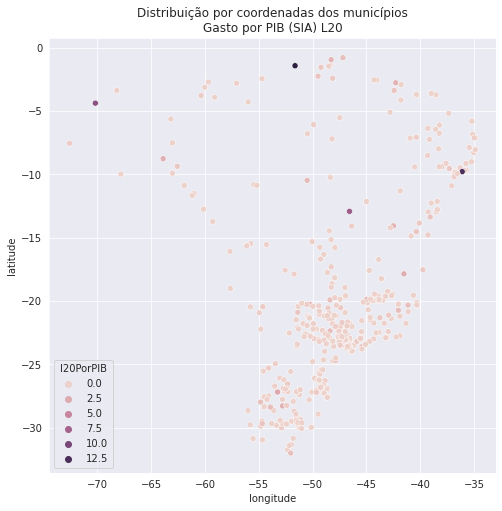

In [145]:
#Dataset soma de valores gastos em relação ao PIB do muncípio
ValoresPorPIB = l20.groupby("PA_UFMUN").sum()[["PA_VALPRO"]].join(dfMUNICIPIOS)
ValoresPorPIB = ValoresPorPIB.drop('MUNICIPIO2', axis=1)
ValoresPorPIB["l20PorPIB"] = (ValoresPorPIB["PA_VALPRO"] / ValoresPorPIB["PIB_1000"])*1000

#Prévia da visualização
plt.figure(figsize=(8,8))
plt.title("Distribuição por coordenadas dos municípios" +"\n"+ "Gasto por PIB (SIA) L20")
sns.scatterplot(data= ValoresPorPIB, x="longitude", y ="latitude", hue="l20PorPIB");

ValoresPorPIB.to_csv("/content/gdrive/MyDrive/DERMATITE_ATOPICA/DATASETS_DERM_ATOP"+"/"+"ValoresSIAPorPIB.csv")

In [146]:
#10 municípios maior com Dermatite Atópica em comparação com ao PIB (AMBULATORIAL)

ValoresPorPIB.sort_values(by="l20PorPIB", ascending=False)[["MUNICIPIO", "UF"]][0:10]

,MUNICIPIO,UF
PA_UFMUN,,
150310,Gurupá,PA
270860,São Miguel dos Campos,AL
130020,Atalaia do Norte,AM
171515,Novo Alegre,TO
431050,Iraí,RS
351550,Fernandópolis,SP
316860,Teófilo Otoni,MG
430470,Carazinho,RS
110020,Porto Velho,RO


In [147]:
ValoresPorPIB_HOSP = ValoresPorPIB.join(dfhospL.groupby("MUNIC_RES")["VAL_TOT"].sum())

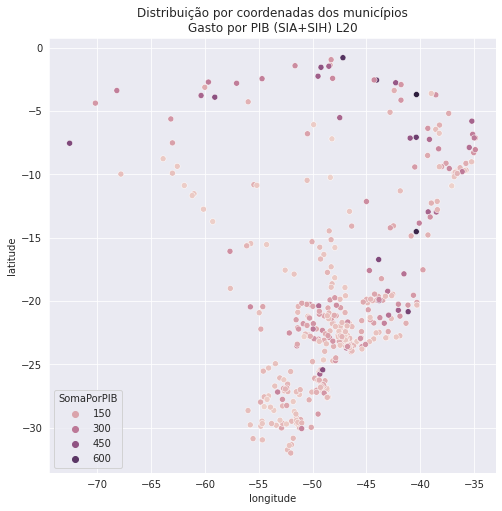

In [148]:
#Soma dos valores ambulatoriais e hospitalares
ValoresPorPIB_HOSP["Soma"] = ValoresPorPIB_HOSP["PA_VALPRO"] + ValoresPorPIB_HOSP["VAL_TOT"]#
ValoresPorPIB_HOSP["SomaPorPIB"] = (ValoresPorPIB_HOSP["Soma"] / ValoresPorPIB_HOSP["PIB_1000"])*1000#


#Prévia 
plt.figure(figsize=(8,8))
plt.title("Distribuição por coordenadas dos municípios" +"\n"+ "Gasto por PIB (SIA+SIH) L20")
sns.scatterplot(data= ValoresPorPIB_HOSP, x="longitude", y ="latitude", hue="SomaPorPIB");


ValoresPorPIB_HOSP.to_csv("/content/gdrive/MyDrive/DERMATITE_ATOPICA/DATASETS_DERM_ATOP"+"/"+"ValoresSIASIHPorPIB.csv")

In [150]:
#10 municípios maior com Dermatite Atópica em comparação com ao PIB (TOTAL)
ValoresPorPIB_HOSP.sort_values(by="SomaPorPIB", ascending=False)[["MUNICIPIO", "UF"]][0:10]

,MUNICIPIO,UF
PA_UFMUN,,
231290,Sobral,CE
292510,Poções,BA
150747,São João de Pirabas,PA
211120,São José de Ribamar,MA
230270,Campos Sales,CE
320120,Cachoeiro de Itapemirim,ES
130165,Guajará,AM
314330,Montes Claros,MG
411950,Piraquara,PR


Chama atenção que nem em número de casos nem em gastos, os maiores valores relativos encontram-se nas capitais estaduais